In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [134]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [135]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func,distinct

In [136]:
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///hawaii.sqlite")
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [137]:
inspector = inspect(engine)

In [138]:
inspector.get_table_names()

['measurement', 'station']

In [139]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [140]:
engine.execute('SELECT * FROM  measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [141]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [142]:
engine.execute('SELECT * FROM station LIMIT 30').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [143]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [144]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [145]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [146]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [149]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1 

In [150]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Latest Date

from datetime import datetime

#l_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
l_date = listToString(session.query(Measurement.date).order_by(Measurement.date.desc()).first())

last_date = datetime.fromisoformat(l_date)

print(last_date)

first_date = last_date - dt.timedelta(days=365)

print(first_date)

2017-08-23 00:00:00
2016-08-23 00:00:00


In [152]:
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the date and precipitation scores

date_prcp = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= first_date).\
    order_by(Measurement.date).all()

In [154]:
date_prcp

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [165]:
all_date_prcp_dict = []
for date,prcp in date_prcp :
    date_prcp_dict = {}
    date_prcp_dict["date"] = date
    date_prcp_dict["precipitation"] = prcp
    all_date_prcp_dict.append(date_prcp_dict)
    
    
    studentsDict = dict(listofTuples)
    
print(date_prcp_dict)


{'date': '2017-08-23', 'precipitation': 0.45}


In [1]:
date_prcp_dict = dict(date_prcp)


NameError: name 'date_prcp' is not defined

In [155]:

# Save the query results as a Pandas DataFrame and set the index to the date column

date_prcp_df = pd.DataFrame.from_records(date_prcp,columns = ['date','precipitation'])

# Sort the dataframe by date
date_prcp_df.sort_values(by="date")
date_prcp_df




,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


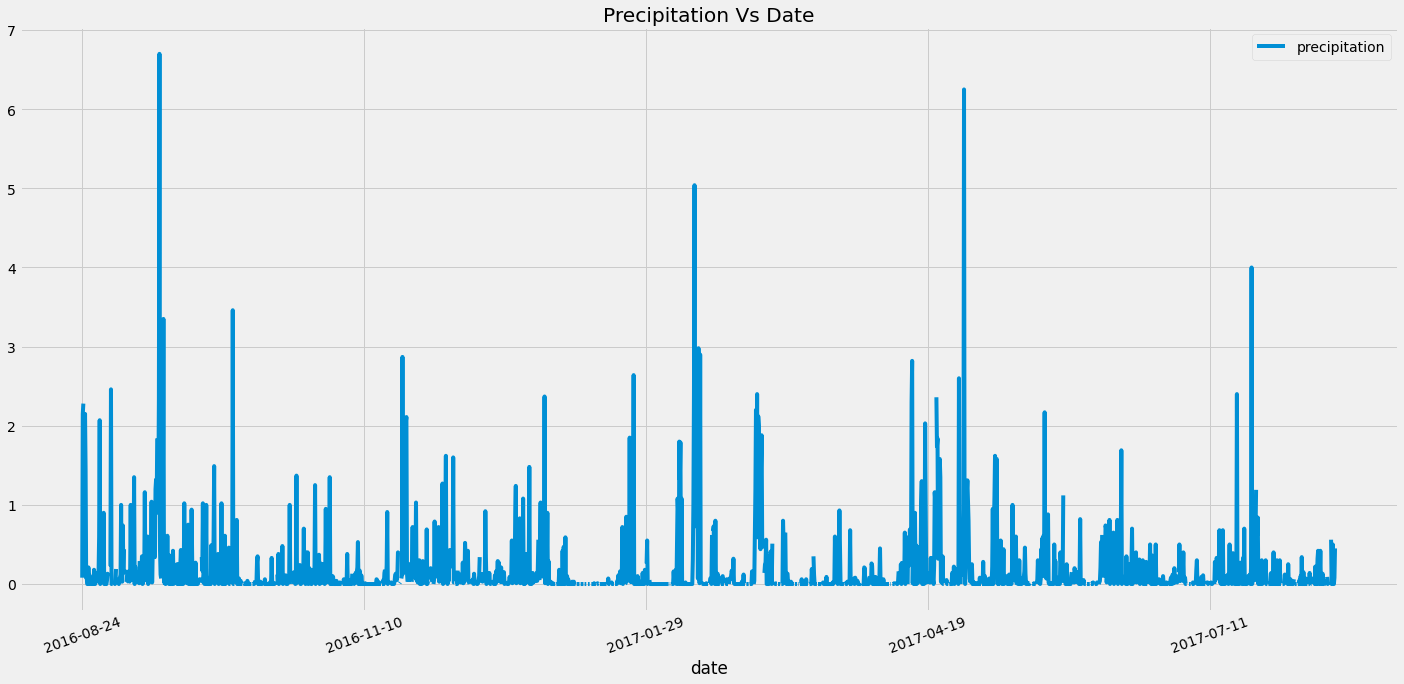

In [156]:
# Use Pandas Plotting with Matplotlib to plot the data

bar_graph = date_prcp_df.plot(x='date', y='precipitation', rot=20 ,figsize =(22,10))
plt.title("Precipitation Vs Date")
plt.show()

In [157]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df[["precipitation"]].describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [95]:
# Design a query to calculate the total number stations in the dataset
#number_of_stations = session.query(func.count(distinct(Station.station))).first()
number_of_stations = session.query(Station).group_by(Station.station).count()
number_of_stations    

9

In [113]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


station_counts = session.query(Station.station,Station.name,func.count(Measurement.station)).group_by(Station.name).\
order_by(func.count(Measurement.station).desc()).\
filter(Station.station == Measurement.station).all()

station_counts
#.order_by.desc(func.count(Measurement.station)).all()

#session.query(Station.name,func.count(Station.station)).group_by(Station.name).all()

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [120]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_counts[0][0]
session.query(Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active_station ).all()
#most_active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [123]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Latest Date

from datetime import datetime

#l_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
l_date = listToString(session.query(Measurement.date).\
        filter(Measurement.station == most_active_station ).\
        order_by(Measurement.date.desc()).first())

last_date = datetime.fromisoformat(l_date)

print(last_date)

first_date = last_date - dt.timedelta(days=365)

print(first_date)

2017-08-18 00:00:00
2016-08-18 00:00:00


In [126]:
date_tob = session.query(Measurement.tobs).\
    filter(Measurement.date >= first_date).\
    order_by(Measurement.date).all()

date_tob

[(77.0,),
 (77.0,),
 (80.0,),
 (79.0,),
 (79.0,),
 (73.0,),
 (80.0,),
 (79.0,),
 (81.0,),
 (81.0,),
 (81.0,),
 (76.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (79.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (79.0,),
 (79.0,),
 (80.0,),
 (78.0,),
 (72.0,),
 (81.0,),
 (76.0,),
 (80.0,),
 (80.0,),
 (80.0,),
 (77.0,),
 (74.0,),
 (79.0,),
 (76.0,),
 (80.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (74.0,),
 (80.0,),
 (77.0,),
 (81.0,),
 (81.0,),
 (80.0,),
 (80.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (81.0,),
 (81.0,),
 (84.0,),
 (80.0,),
 (77.0,),
 (73.0,),
 (81.0,),
 (81.0,),
 (75.0,),
 (74.0,),
 (78.0,),
 (73.0,),
 (81.0,),
 (80.0,),
 (73.0,),
 (71.0,),
 (78.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (76.0,),
 (79.0,),
 (78.0,),
 (77.0,),
 (75.0,),
 (80.0,),
 (77.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (81.0,),
 (79.0,),
 (82.0,),
 (82.0,),
 (80.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (81.0,),
 (81.0,),
 (81.0,),
 (80.0,),
 (75.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),


Text(0, 0.5, 'Frequency')

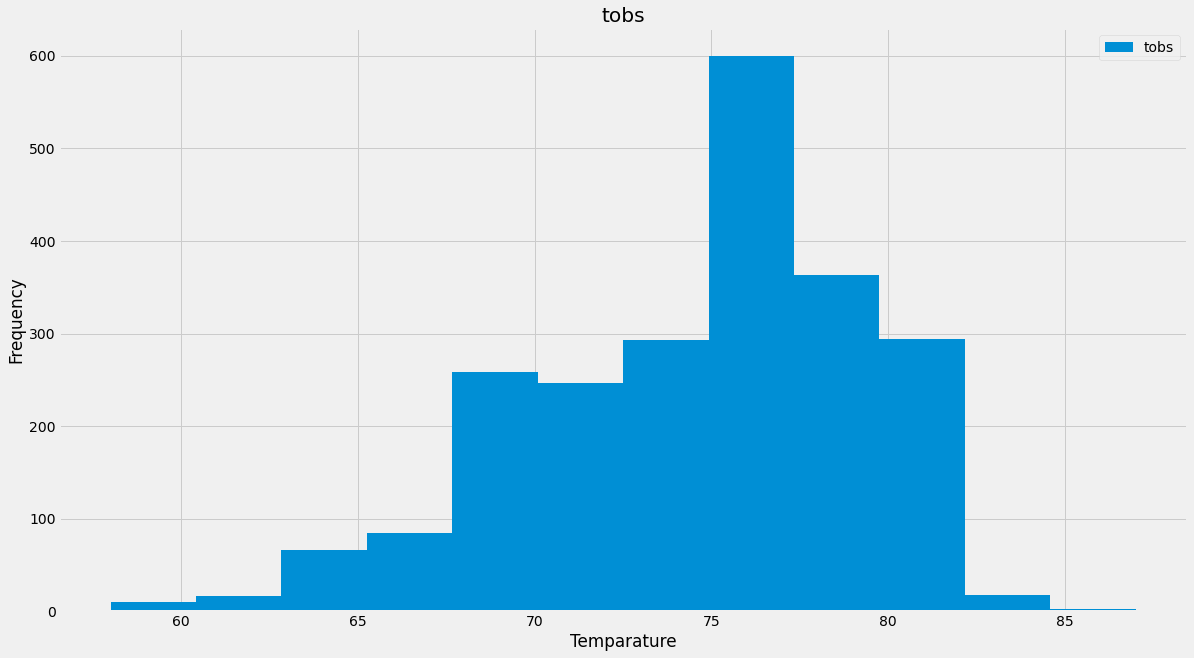

In [132]:
tob_df = pd.DataFrame.from_records(date_tob,columns = ['tobs'])
#tob_df
hist = tob_df.hist(bins=12,figsize=(18, 10),legend=True)
plt.xlabel('Temparature')
plt.ylabel("Frequency")

# Close session

In [ ]:
# Close Session
session.close()